In [1]:
from google.colab import files
uploaded = files.upload()


Saving Food Delivery Time Prediction Case Study.xlsx.zip to Food Delivery Time Prediction Case Study.xlsx.zip


In [3]:
import zipfile

with zipfile.ZipFile("Food Delivery Time Prediction Case Study.xlsx.zip", 'r') as zip_ref:
    zip_ref.extractall("food_delivery_data")


In [4]:
import pandas as pd

file_path = "food_delivery_data/Food Delivery Time Prediction Case Study.xlsx"
df = pd.read_excel(file_path)

df.head()  # Preview the dataset


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
!pip install geopy seaborn openpyxl


In [7]:
df = pd.read_excel('food_delivery_data/Food Delivery Time Prediction Case Study.xlsx')


In [8]:
df.shape          # Number of rows and columns
df.columns        # List all column names
df.info()         # Data types and non-null values
df.describe()     # Statistics for numeric columns
df.head()         # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [9]:
df.isnull().sum()        # Count missing values
df.duplicated().sum()    # Check for duplicates


np.int64(0)

In [10]:
import numpy as np
x = np.int64(0)
print(type(x))  # <class 'numpy.int64'>


<class 'numpy.int64'>


In [11]:
df.isnull().sum()        # Count missing values
df.duplicated().sum()    # Check for duplicates


np.int64(0)

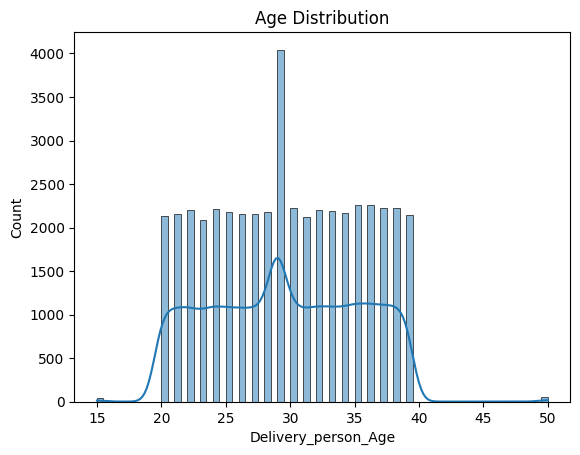

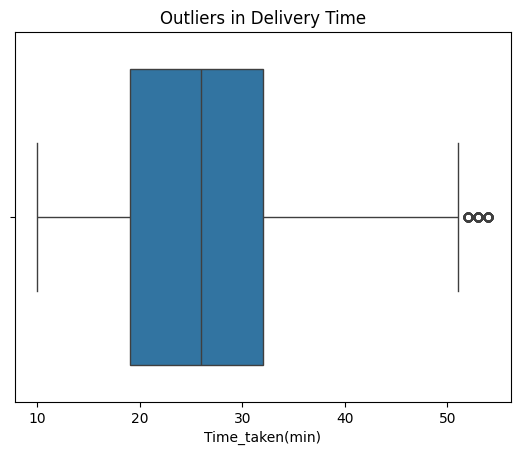

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Delivery_person_Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x=df['Time_taken(min)'])
plt.title('Outliers in Delivery Time')
plt.show()


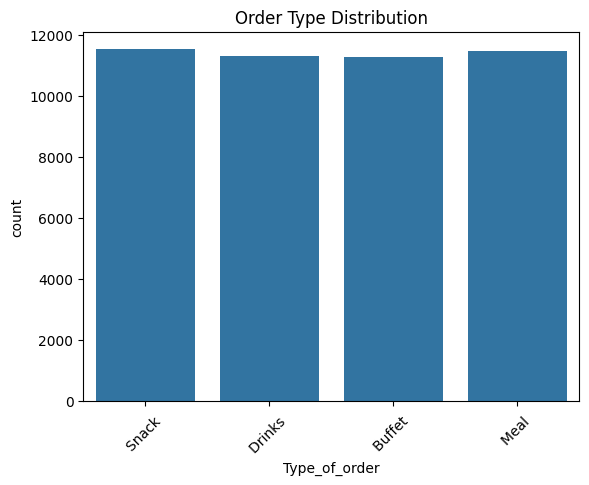

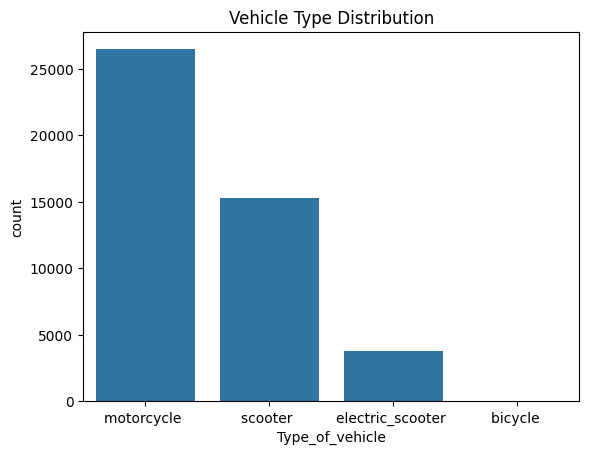

In [13]:
sns.countplot(x='Type_of_order', data=df)
plt.title('Order Type Distribution')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Type_of_vehicle', data=df)
plt.title('Vehicle Type Distribution')
plt.show()


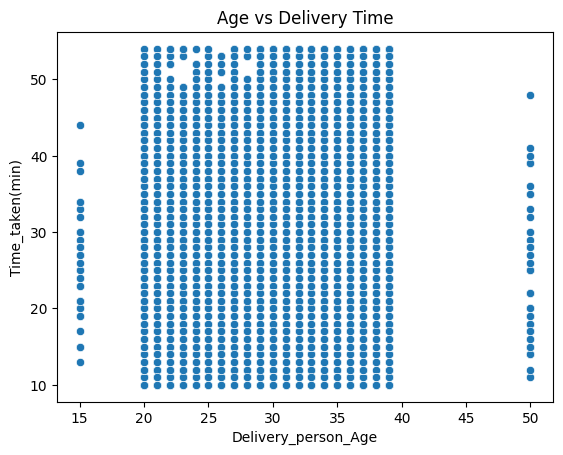

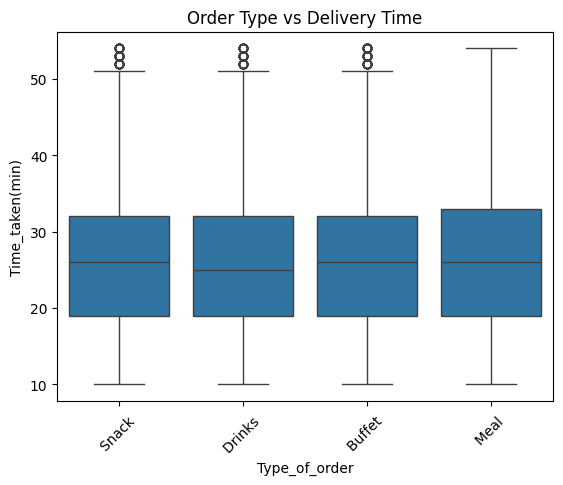

In [14]:
# Age vs Time Taken
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df)
plt.title('Age vs Delivery Time')
plt.show()

# Type of Order vs Time Taken
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=df)
plt.title('Order Type vs Delivery Time')
plt.xticks(rotation=45)
plt.show()


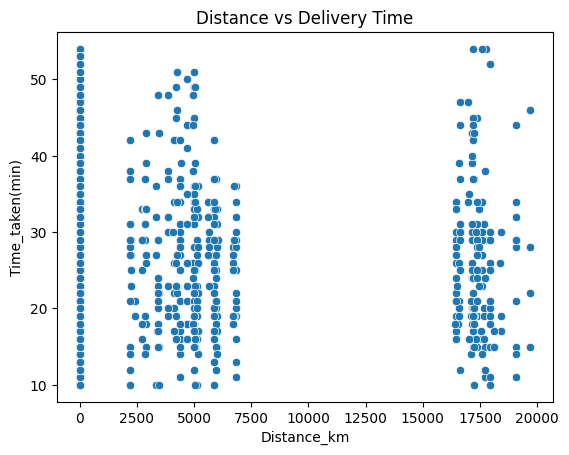

In [15]:
from geopy.distance import geodesic

# Compute distance (in kilometers)
df['Distance_km'] = df.apply(lambda row: geodesic(
    (row['Restaurant_latitude'], row['Restaurant_longitude']),
    (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
).km, axis=1)

# Plot Distance vs Delivery Time
sns.scatterplot(x='Distance_km', y='Time_taken(min)', data=df)
plt.title('Distance vs Delivery Time')
plt.show()


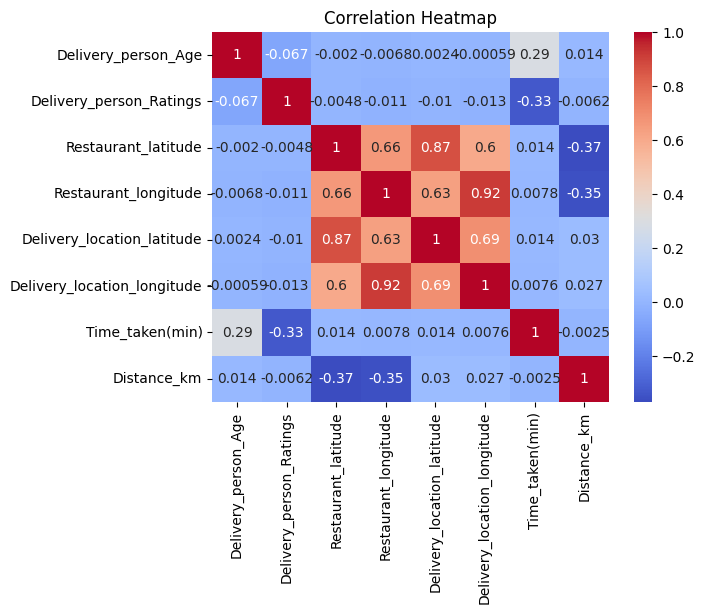

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Type_of_order', 'Type_of_vehicle']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [18]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_km', 'Type_of_order', 'Type_of_vehicle']
target = 'Time_taken(min)'

X = df[features]
y = df[target]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [8]:
import pandas as pd
from geopy.distance import geodesic

# Load the dataframe if it's not already loaded
try:
    df.head()
except NameError:
    file_path = "food_delivery_data/Food Delivery Time Prediction Case Study.xlsx"
    df = pd.read_excel(file_path)

# Calculate distance between restaurant and delivery location
df['Distance_km'] = df.apply(lambda row: geodesic(
    (row['Restaurant_latitude'], row['Restaurant_longitude']),
    (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
).km, axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type_of_order'] = le.fit_transform(df['Type_of_order'])
df['Type_of_vehicle'] = le.fit_transform(df['Type_of_vehicle'])


In [10]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_km', 'Type_of_order', 'Type_of_vehicle']
target = 'Time_taken(min)'

X = df[features]
y = df[target]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 6.636300604212076
RMSE: 8.463186511811342
R² Score: 0.1830856744224204


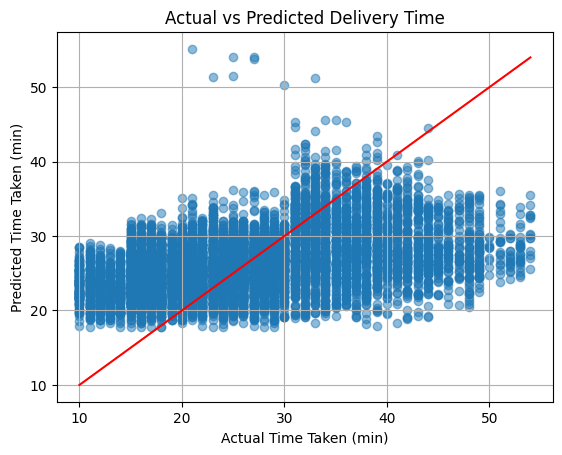

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Time Taken (min)")
plt.ylabel("Predicted Time Taken (min)")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # perfect prediction line
plt.grid(True)
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)


Random Forest Results:
MAE: 6.030789025007963
RMSE: 7.728674869299132
R² Score: 0.3187307866715161


In [16]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb)


XGBoost Results:
MAE: 5.741064548492432
RMSE: 7.2965678573105786
R² Score: 0.3927801847457886


In [17]:
import joblib

joblib.dump(rf_model, 'best_model.pkl')  # or xgb_model


['best_model.pkl']

In [18]:
# Example input
sample = [[35, 4.5, 3.2, 1, 0]]  # age, rating, distance, order type, vehicle type
predicted_time = rf_model.predict(sample)
print("Predicted Delivery Time (min):", predicted_time[0])


Predicted Delivery Time (min): 20.31


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
